In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df= pd.read_excel("/Users/apple/Desktop/y4s2/capstone/week 2 data set/R1G_R1V.xlsx")

slow and fast signal

In [78]:
monthly_ratio = df.resample('M', on='Date')['ratio'].mean()
monthly_ratio_pct_change = monthly_ratio.pct_change().dropna()


lookback_fast = 2
lookback_slow = 12

fast_signal = monthly_ratio_pct_change.rolling(window=lookback_fast).mean().dropna()
slow_signal = monthly_ratio_pct_change.rolling(window=lookback_slow).mean().dropna()

monthly_ratio.index = monthly_ratio.index.to_period('M')
fast_signal.index = fast_signal.index.to_period('M')
slow_signal.index = slow_signal.index.to_period('M')

# Now the indices of monthly_ratio, fast_signal, and slow_signal only contain year and month
monthly_ratio, fast_signal, slow_signal

monthly_ratio.to_frame()  


,ratio
Date,
1991-01,0.994711
1991-02,1.014354
1991-03,1.031177
1991-04,1.048159
1991-05,1.042428
...,...
2023-08,1.245527
2023-09,1.262099
2023-10,1.291403


In [79]:
common_length = min(len(fast_signal), len(slow_signal))
aligned_fast_signal = fast_signal[-common_length:]
aligned_slow_signal = slow_signal[-common_length:]

def classify_market_condition(slow, fast):
    if slow >= 0 and fast >= 0:
        return 'Bull'
    elif slow >= 0 and fast < 0:
        return 'Correction'
    elif slow < 0 and fast < 0:
        return 'Bear'
    elif slow < 0 and fast >= 0:
        return 'Rebound'
    else:
        return 'Undefined'
    
    
market_conditions = pd.DataFrame({
    'Slow Signal': aligned_slow_signal,
    'Fast Signal': aligned_fast_signal
}).apply(lambda row: classify_market_condition(row['Slow Signal'], row['Fast Signal']), axis=1)

market_conditions.to_frame()    

,0
Date,
1992-01,Bull
1992-02,Correction
1992-03,Correction
1992-04,Correction
1992-05,Bear
...,...
2023-08,Correction
2023-09,Bull
2023-10,Bull


In [77]:
merged_df = pd.merge(monthly_ratio, market_conditions, on='Date', how='inner')
merged_df.head(5)


ValueError: Cannot merge a Series without a name

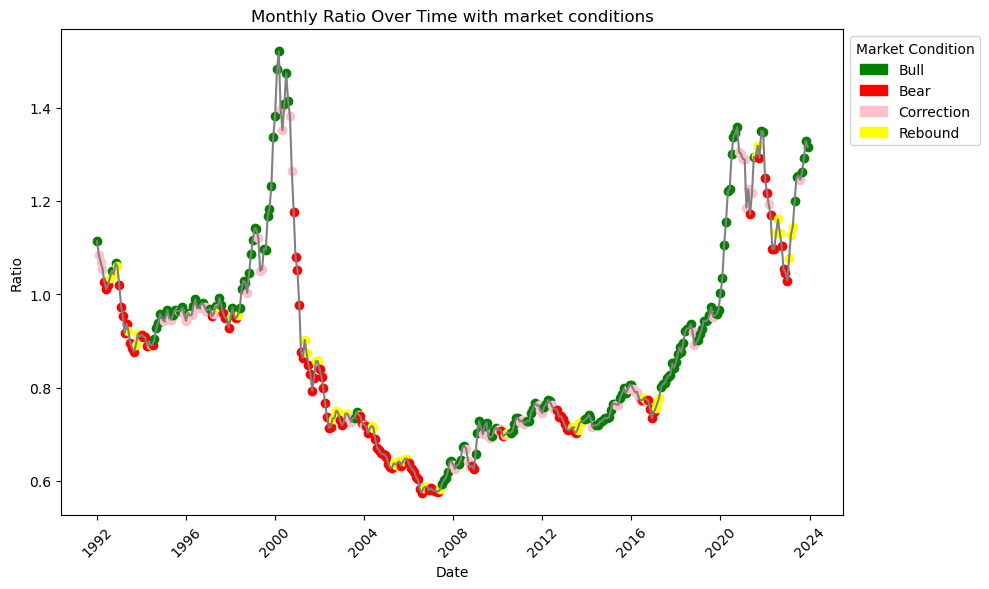

In [63]:
import matplotlib.patches as mpatches

merged_df.reset_index(inplace=True)
merged_df['Date'] = merged_df['Date'].dt.to_timestamp()

#plot the four market condition
color_map = {
    'Bull': 'green',
    'Bear': 'red',
    'Correction': 'pink',
    'Rebound': 'yellow'
}
plt.figure(figsize=(10, 6))
for index, row in merged_df.iterrows():
    plt.scatter(row['Date'], row['ratio'], color=color_map.get(row[0], 'blue'))

#plot the monthly ratio
plt.plot(merged_df['Date'], merged_df['ratio'], linestyle='-' , color='gray')

#add a legend for market condition
legend_handles = []
for condition, color in color_map.items():
    # Plot an empty list to create the legend entry
    legend_handles.append(mpatches.Patch(color=color, label=condition))


# Add the legend to the plot
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), title='Market Condition')
plt.title('Monthly Ratio Over Time with market conditions')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust subplot params
plt.show()
